
# Regression Assignment - House Prices

## Introduction

This notebook will seek to build Linear, Lasso & Ridge regression models to predict house prices. We will begin with exploring the data to get a better understanding, then will conduct the relevant regression. 

- The results of the regresion will be reported, with a 70% training and 30% testing split.

- Will conduct cross validation of 4 folds.

- Grid search for Lasso

- Report metrics of RSquared, RMSE, MSE, MAE, MAPE

In [41]:
# Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read dataset and view
df = pd.read_csv('house_prices.csv')
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [3]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [5]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,500000.0,124.929554,71.795363,1.0,63.0,125.0,187.0,249.0
Garage,500000.0,2.001290,0.817005,1.0,1.0,2.0,3.0,3.0
FirePlace,500000.0,2.003398,1.414021,0.0,1.0,2.0,3.0,4.0
Baths,500000.0,2.998074,1.414227,1.0,2.0,3.0,4.0,5.0
White Marble,500000.0,0.332992,0.471284,0.0,0.0,0.0,1.0,1.0
Black Marble,500000.0,0.332690,0.471177,0.0,0.0,0.0,1.0,1.0
Indian Marble,500000.0,0.334318,0.471752,0.0,0.0,0.0,1.0,1.0
Floors,500000.0,0.499386,0.500000,0.0,0.0,0.0,1.0,1.0
City,500000.0,2.000940,0.816209,1.0,1.0,2.0,3.0,3.0
Solar,500000.0,0.498694,0.499999,0.0,0.0,0.0,1.0,1.0


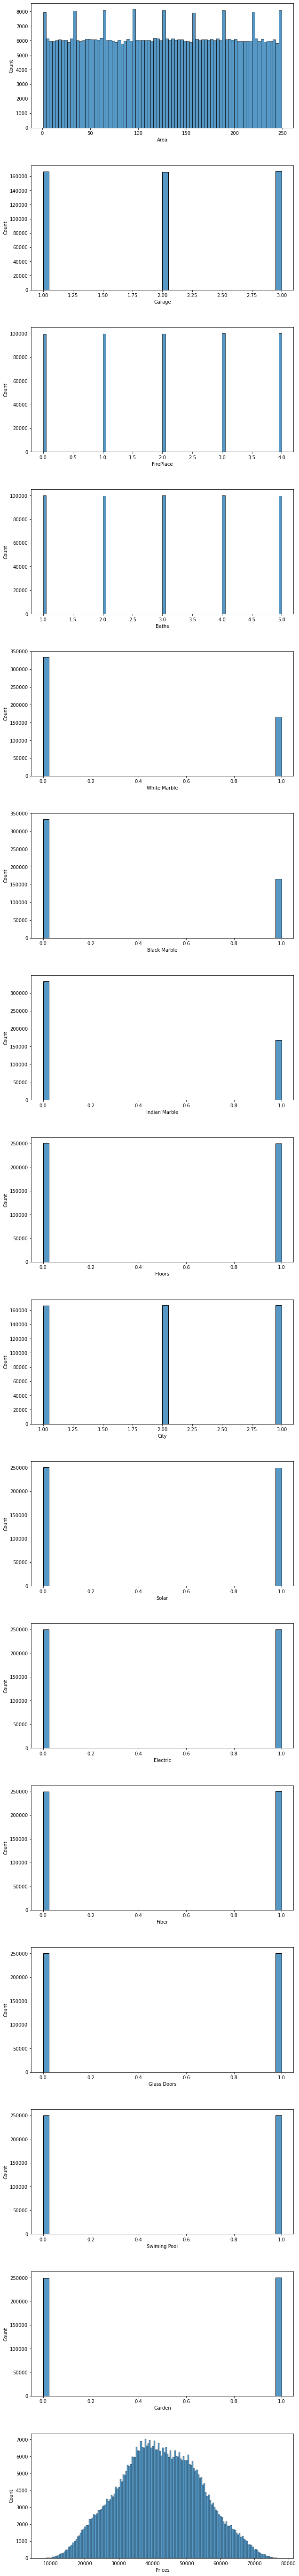

In [24]:
# Histograms

fig, axs = plt.subplots(len(df.columns), figsize=(10, 100))
fig.subplots_adjust(hspace=0.3)
for n, col in enumerate(df.columns):
    sns.histplot(df, x=col, ax=axs[n])

- Area is distributed uniformally
- 1 - 3 Garages
- 0 - 4 FirePlaces
- 1 - 5 Baths
- 3 Cities
- White Marble, Black Marble, Indian Marble, Floors, Solar, Electric, Fiber, Glass Doors, Swimming Pool, Garden are all Binary Variables
- Prices are normally distributed

In [39]:
# Correlation and Heatmap
price_correlation = df.corr()[-1:].sort_values(by='Prices', axis=1, ascending=False)
price_correlation

,Prices,Floors,Fiber,White Marble,City,Glass Doors,Area,Baths,Garage,FirePlace,Electric,Solar,Swiming Pool,Garden,Black Marble,Indian Marble
Prices,1.0,0.619451,0.484626,0.448154,0.233259,0.181973,0.147717,0.145087,0.100294,0.089139,0.052443,0.008429,0.001787,0.00154,-0.078049,-0.369756


In [40]:
fig = px.imshow(price_correlation)
fig.show()

- Floors, Fiber & White Marble have the strongest positive correlation with price
- Black & Indian Marble appear to be less sought after, given the negative correlation with price 

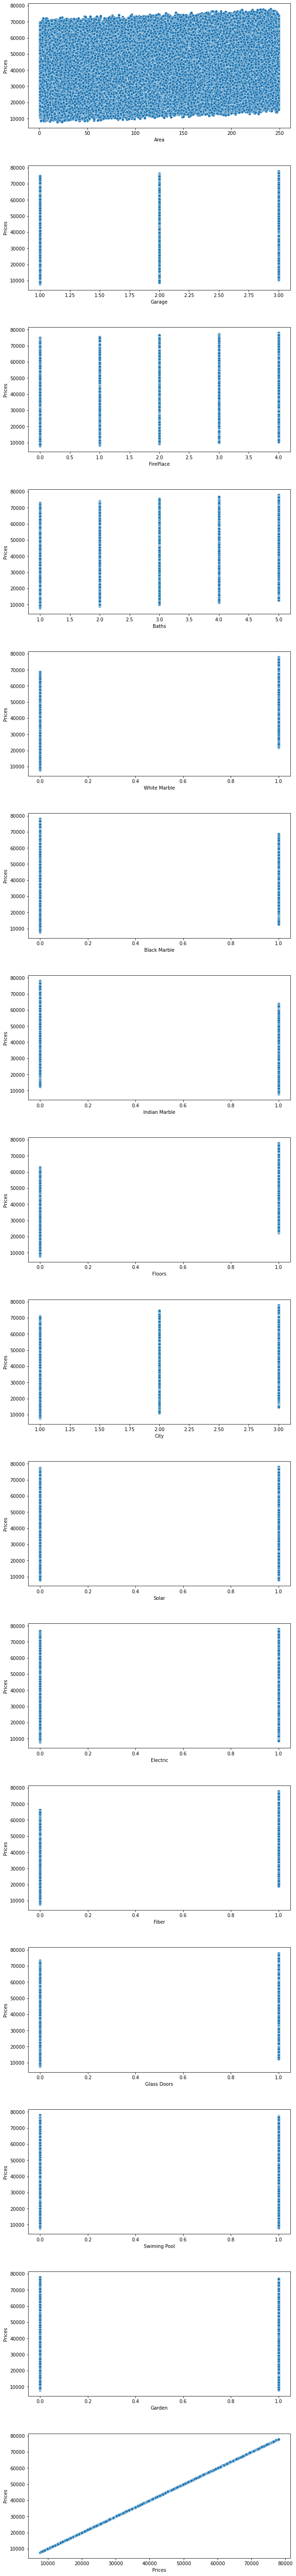

In [43]:
# Scatter Plots

fig, axs = plt.subplots(len(df.columns), figsize=(10, 100))
fig.subplots_adjust(hspace=0.3)
for n, col in enumerate(df.columns):
    sns.scatterplot(data=df, y= 'Prices', x=col, ax=axs[n])

    
## TODO: Split out based on Numerical & Binary Variables - Binary Variables will require 'Jitter'

#### Thoughts
1. Explore breaking up by city